In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# سوال 1 و 2 و 3

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))


## K-Means

In [ ]:
class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]


        for _ in range(self.max_iters):
            print("iter:", _)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()



## KNN

In [ ]:
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def priedicte(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k] 
        k_nearest_labls = [self.y_train[i] for i in k_indices]
        
        most_common =  Counter(k_nearest_labls).most_common()
        return most_common[0][0]

 

## main

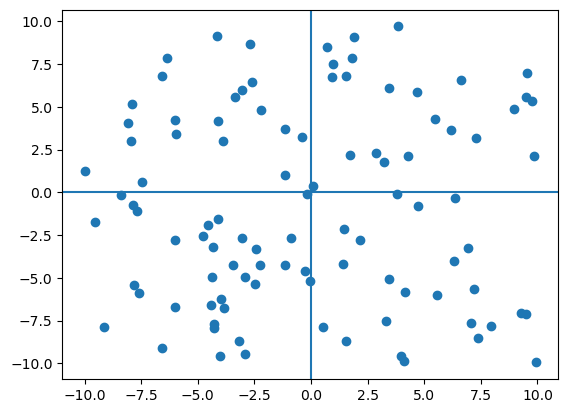

In [ ]:
X = np.random.uniform(-10, 10, (100, 2))
y = np.random.choice([0, 1, 2, 3], X.shape[0])

plt.scatter(X[:, 0], X[:, 1])
plt.axvline()
plt.axhline()

(100, 2)
clusters: 4
iter: 0
iter: 1
iter: 2
iter: 3


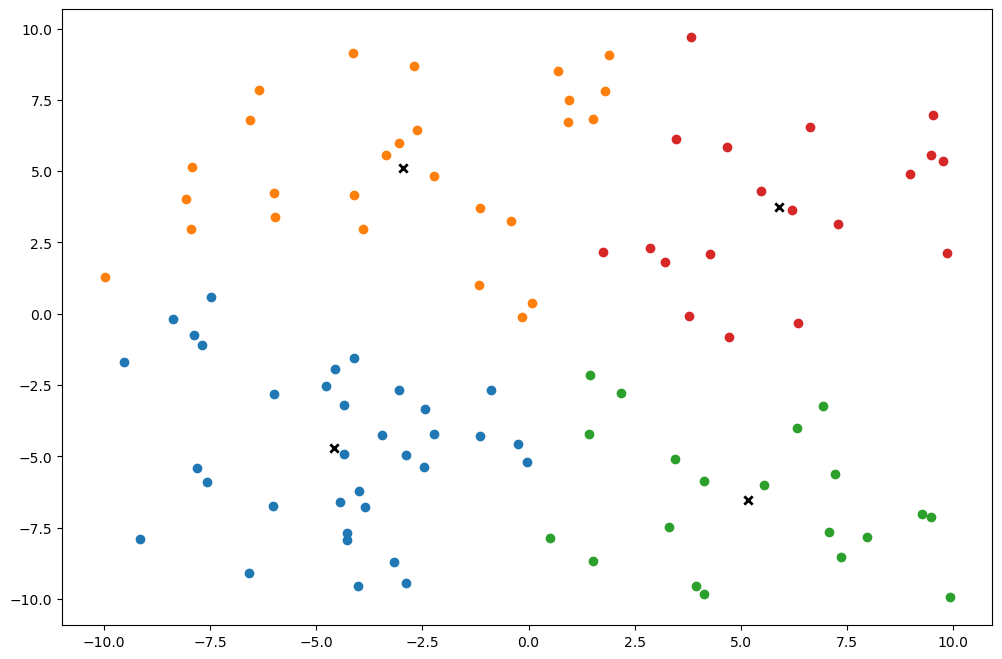

In [ ]:
print(X.shape)

clusters = len(np.unique(y))
print("clusters:", clusters)

k = KMeans(K=clusters, max_iters=50, plot_steps=False)
y_pred = k.predict(X)
k.plot()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_pred, test_size=0.3, random_state=42)


knn = KNN(k=3)
knn.fit(X_train, y_train)
preds = knn.priedicte(X_test)
print("KNN accuracy:", sum(preds == y_test) / len(y_test))

KNN accuracy: 0.9333333333333333


# سوال 4

In [ ]:

def initial_pop(n=1, low=[], high=[]):
    pop = np.random.uniform(low, high, (n, len(low)))
    return pop


def fitness_max(chrom):
    n = chrom.shape[0]
    sigma = [np.sin(10 * np.log(x)) for x in chrom]
    f = (1/n) * np.sum(sigma)
    return f

def fitness(chrom):
    return fitness_max(chrom)




def tournament_selection(parent1, parent2, t):
    i = fitness(parent1)
    j = fitness(parent2)
    rand = np.random.rand()
    if rand < 1 / np.exp(-(i - j)/t):
        return parent1
    else:
        return parent2

def linear_crossover(parent1, parent2, y1=0.3, y2=0.7):
    o1 = y1*parent1 + y2*parent2
    o2 = y2*parent1 + y1*parent2
    return o1, o2

# continuous static mutation
def static_mutation(gene, low, high):
    r = np.random.rand()
    x = low + r*(high - low)
    return x

def mutation(pop, low, high, pm=0.001):
    n = int(pop.shape[0] * pop.shape[1] * pm)
    for i in range(pop.shape[0]):
        for j in range(pop.shape[1]):
            if np.random.rand() <= n:
                pop[i][j] = static_mutation(pop[i][j], low[j], high[j])
    return pop
        

def crossover(pop, pc=0.9):
    rand = np.random.rand()
    pop = list(pop)
    for i in range(1, len(pop), 2):
        if rand < pc:
            pop[i-1], pop[i] = linear_crossover(pop[i-1], pop[i])
    return np.array(pop)


def selection(pop, t):
    mating_pool = []
    pop = list(pop)
    for i in range(1, len(pop), 2):
        winer = tournament_selection(pop[i-1], pop[i], t)
        mating_pool.append(winer)
    return np.array(mating_pool)




C:\Users\momoein\AppData\Local\Temp\ipykernel_16080\1451789962.py:26: RuntimeWarning: overflow encountered in exp
  if rand < 1 / np.exp(-(i - j)/t):
C:\Users\momoein\AppData\Local\Temp\ipykernel_16080\1451789962.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  if rand < 1 / np.exp(-(i - j)/t):


[0.9538678192484624, 0.9981796552127142, 0.9981796552127142, 0.9981796552127142, 0.9981796552127142, 0.9981796552127142, 0.9981796552127142, 0.9981796552127142, 0.9981796552127142, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485, 0.9991410389036485,

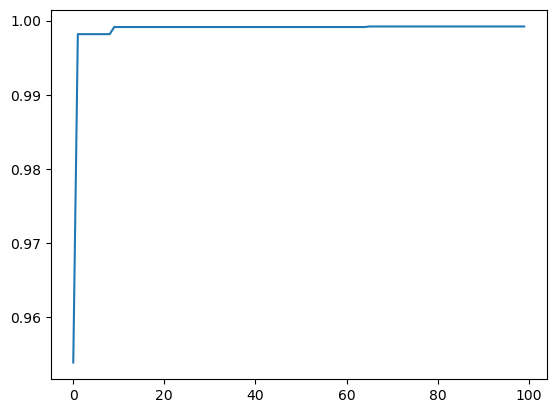

In [ ]:
lo = np.array([0, 0])
hi = np.array([10, 10])

pop = initial_pop(100, lo, hi) 
next_generation = []

best_chroms = []
best_fits = []
T = 2
for iter in range(100):
    childs = crossover(pop, pc=0.9)
    childs = mutation(childs, lo, hi, pm=0.01)
    pop = list(pop) + list(childs)
    pop = selection(np.array(pop), T)
    best_chrom = max(pop, key=lambda chrom: fitness(chrom))
    best_chroms.append(best_chrom)
    best_fits.append(fitness(best_chrom))
    T /= 3


plt.plot(best_fits)
print(best_fits)
print(best_chroms[-1])

C:\Users\momoein\AppData\Local\Temp\ipykernel_8776\2399163072.py:16: RuntimeWarning: divide by zero encountered in log
  R = np.sin(10 * np.log(X)) + np.sin(10 * np.log(Y))
C:\Users\momoein\AppData\Local\Temp\ipykernel_8776\2399163072.py:16: RuntimeWarning: invalid value encountered in sin
  R = np.sin(10 * np.log(X)) + np.sin(10 * np.log(Y))


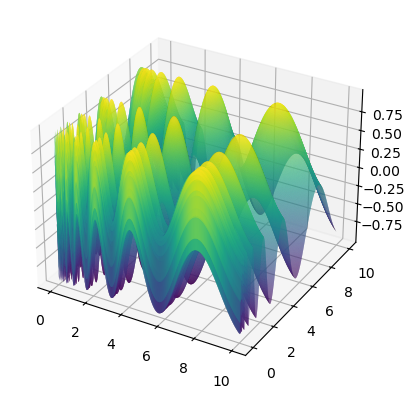

In [ ]:
# lo = np.array([0, 0])
# hi = np.array([10, 10])
# X_ = initial_pop(100, lo, hi) 
#
# n = X_.shape[0]
# X = X_[:, 0:1]
# X = np.reshape(X, (n)).T
# Y = X_[:, 1:]
# Y = np.reshape(Y, (n)).T

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X = np.linspace(0, 10, 1000)
Y = np.linspace(0, 10, 1000)
X, Y = np.meshgrid(X, Y)
R = np.sin(10 * np.log(X)) + np.sin(10 * np.log(Y))
Z = (1/2) * R
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')